In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details, full_stats

import tubesml as tml

pd.set_option("max_columns", 300)

In [3]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [4]:
women_comp = list_all_files('data/raw_women/')

In [5]:
women_comp

['data/raw_women/WDataFiles_Stage2/WRegularSeasonCompactResults.csv',
 'data/raw_women/WDataFiles_Stage2/Conferences.csv',
 'data/raw_women/WDataFiles_Stage2/Cities.csv',
 'data/raw_women/WDataFiles_Stage2/WTeamSpellings.csv',
 'data/raw_women/WDataFiles_Stage2/WSeasons.csv',
 'data/raw_women/WDataFiles_Stage2/WGameCities.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage2/WSampleSubmissionStage2.csv',
 'data/raw_women/WDataFiles_Stage2/WTeams.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneySeeds.csv',
 'data/raw_women/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneySlots.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneyCompactResults.csv',
 'data/raw_women/WDataFiles_Stage2/WTeamConferences.csv',
 'data/raw_women/W2021_Stage1/WRegularSeasonCompactResults.csv',
 'data/raw_women/W2021_Stage1/Conferences.csv',
 'data/raw_women/W2021_Stage1/Cities.csv',
 'data/raw_women/

# submission file

In [6]:
[col for col in women_comp if 'Submission' in col]

['data/raw_women/WDataFiles_Stage2/WSampleSubmissionStage2.csv',
 'data/raw_women/W2021_Stage1/WSampleSubmissionStage1.csv']

In [7]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WSampleSubmissionStage2.csv')
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2021_3104_3112,0.5,2021,3104,3112
1,2021_3104_3116,0.5,2021,3104,3116
2,2021_3104_3124,0.5,2021,3104,3124
3,2021_3104_3125,0.5,2021,3104,3125
4,2021_3104_3133,0.5,2021,3104,3133


In [8]:
df.year.value_counts(dropna=False)

2021    2016
Name: year, dtype: int64

# Teams.csv

In [9]:
[file for file in women_comp if 'Teams.csv' in file]

['data/raw_women/WDataFiles_Stage2/WTeams.csv',
 'data/raw_women/W2021_Stage1/WTeams.csv']

In [10]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WTeams.csv')
df.shape

(369, 2)

In [11]:
df.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


# Seasons.csv

In [12]:
[file for file in women_comp if 'Seasons.csv' in file]

['data/raw_women/WDataFiles_Stage2/WSeasons.csv',
 'data/raw_women/W2021_Stage1/WSeasons.csv']

In [13]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WSeasons.csv')
print(df.shape)
df.head()

(24, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/1/1999,East,Midwest,Mideast,West
3,2001,10/30/2000,East,Midwest,Mideast,West
4,2002,10/29/2001,East,West,Mideast,Midwest


In [14]:
df.RegionW.value_counts()

East           7
Albany         3
Bridgeport     3
Dallas         2
Albuquerque    1
Lincoln        1
Berkeley       1
NA1            1
Greensboro     1
Chattanooga    1
Dayton         1
DesMoines      1
Alamo          1
Name: RegionW, dtype: int64

In [15]:
df.RegionX.value_counts()

Spokane         4
Midwest         3
West            2
Mideast         2
OklahomaCity    1
Cleveland       1
NA2             1
Norfolk         1
Dayton          1
Chicago         1
Memphis         1
Dallas          1
Hemisfair       1
Fresno          1
Trenton         1
Tempe           1
Stanford        1
Name: RegionX, dtype: int64

In [16]:
df.RegionY.value_counts()

Mideast         5
KansasCity      3
Lexington       2
Greensboro      2
OklahomaCity    2
Midwest         2
Mercado         1
Louisville      1
Fresno          1
NewOrleans      1
Dayton          1
NA3             1
Bridgeport      1
Kingston        1
Name: RegionY, dtype: int64

In [17]:
df.RegionZ.value_counts()

West            5
OklahomaCity    2
Philadelphia    2
Midwest         2
Raleigh         2
San Antonio     1
Portland        1
NotreDame       1
Sacramento      1
Spokane         1
Lexington       1
Greensboro      1
NA4             1
Stockton        1
SiouxFalls      1
RiverWalk       1
Name: RegionZ, dtype: int64

# Regular season compact results

In [18]:
[file for file in women_comp if 'RegularSeasonCompact' in file]

['data/raw_women/WDataFiles_Stage2/WRegularSeasonCompactResults.csv',
 'data/raw_women/W2021_Stage1/WRegularSeasonCompactResults.csv']

In [19]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WRegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(115739, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


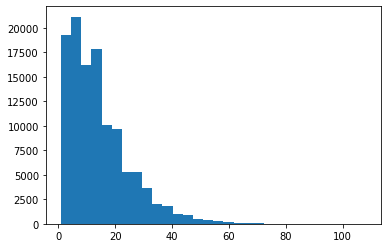

In [20]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [21]:
df.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,point_diff
count,115739.00000,115739.000000,115739.000000,115739.000000,115739.000000,115739.000000,115739.000000,115739.000000
mean,2009.83633,71.539706,3284.412022,71.860039,3284.447982,57.539006,0.037749,14.321033
std,6.72579,34.993665,103.812875,11.346844,104.919382,10.806747,0.222545,10.880764
min,1998.00000,1.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000,1.000000
25%,2004.00000,40.000000,3196.000000,64.000000,3193.000000,50.000000,0.000000,6.000000
50%,2010.00000,75.000000,3282.000000,71.000000,3284.000000,57.000000,0.000000,12.000000
75%,2016.00000,102.000000,3376.000000,79.000000,3375.000000,64.000000,0.000000,19.000000
max,2021.00000,132.000000,3471.000000,140.000000,3471.000000,130.000000,5.000000,108.000000


In [22]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1998,39,126,75.324457,75,27,101,60.342037,60,0,0,0.000000,0,1,80,14.982420,13
1999,38,130,74.747577,74,20,111,60.192390,60,0,0,0.000000,0,1,97,14.555188,12
2000,37,133,74.013339,73,25,104,59.191047,59,0,0,0.000000,0,1,80,14.822293,13
2001,36,135,74.269319,74,24,104,59.652263,59,0,0,0.000000,0,1,98,14.617055,12
2002,42,124,73.595371,73,23,99,58.876920,59,0,0,0.000000,0,1,80,14.718451,12
2003,37,128,72.299628,72,16,102,57.940906,58,0,0,0.000000,0,1,78,14.358722,12
2004,38,125,71.206491,71,18,119,57.316707,57,0,0,0.000000,0,1,82,13.889784,12
2005,37,118,69.858742,69,22,99,55.830534,56,0,4,0.050172,0,1,79,14.028208,11
2006,38,119,71.175834,71,22,95,57.262901,57,0,3,0.056275,0,1,86,13.912933,12


<AxesSubplot:xlabel='Season'>

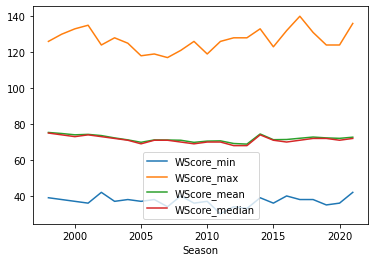

In [23]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

<AxesSubplot:xlabel='Season'>

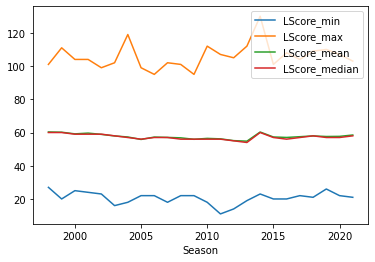

In [24]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

<AxesSubplot:xlabel='Season'>

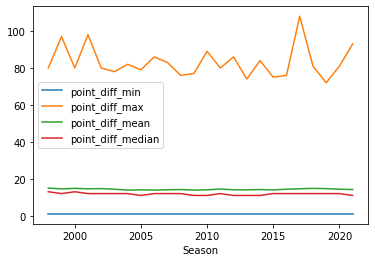

In [25]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

<AxesSubplot:xlabel='Season'>

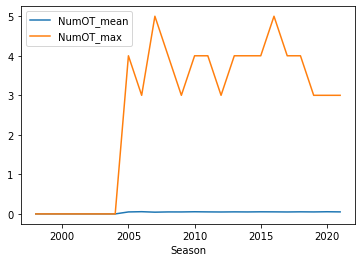

In [26]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [27]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1998   A             44         125    73.769759             73          1455   
       H             39         126    76.261915             76          2413   
1999   A             45         116    73.192547             73          1610   
       H             38         130    75.706804             75          2616   
       N             61          86    73.600000             73             5   
...                 ...         ...          ...            ...           ...   
2020   H             42         124    72.765211             72          2909   
       N             46         114    72.023026             71           304   
2021   A             42         120    71.647558             71          1413   
       H             43         136    73.724653             73          1874   
       N             43         104    71.085502             70           269   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1998   A             27         101    61.104467           61.0          1455   
       H             27          95    59.882304           60.0          2413   
1999   A             29         111    60.837888           61.0          1610   
       H             20         101    59.784404           59.0          2616   
       N             52          79    65.800000           64.0             5   
...                 ...         ...          ...            ...           ...   
2020   H             22         107    57.096941           57.0          2909   
       N             31          99    58.292763           58.0           304   
2021   A             28         103    58.742392           58.0          1413   
       H             21         102    58.248666           58.0          1874   
       N             30          92    59.026022           59.0           269   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1998   A             0          0    0.000000             0         1455   
       H             0          0    0.000000             0         2413   
1999   A             0          0    0.000000             0         1610   
       H             0          0    0.000000             0         2616   
       N             0          0    0.000000             0            5   
...                ...        ...         ...           ...          ...   
2020   H             0          3    0.052939             0         2909   
       N             0          1    0.026316             0          304   
2021   A             0          3    0.053079             0         1413   
       H             0          3    0.048026             0         1874   
       N             0          2    0.066914             0          269   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1998   A                  1              79        12.665292   
       H                  1              80        16.379610   
1999   A                  1              62        12.354658   
       H                  1              97        15.922401   
       N                  1              18         7.800000   
...                     ...             ...              ...   
2020   H                  1              81        15.668271   
       N                  1              53        13.730263   
2021   A                  1              69        12.905166   
       H                  1              93        15.475987   
       N                  1              50        12.059480   

             point_diff_median  point_diff_count  
Season WLoc                     

<AxesSubplot:xlabel='Season'>

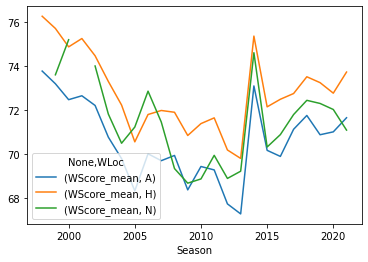

In [28]:
summaries[['WScore_mean']].unstack().plot()

<AxesSubplot:xlabel='Season'>

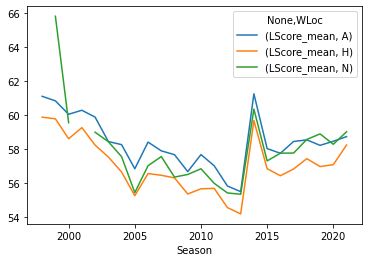

In [29]:
summaries[['LScore_mean']].unstack().plot()

<AxesSubplot:xlabel='Season'>

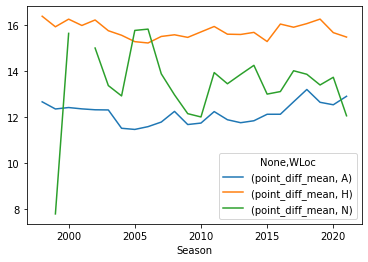

In [30]:
summaries[['point_diff_mean']].unstack().plot()

<AxesSubplot:xlabel='Season'>

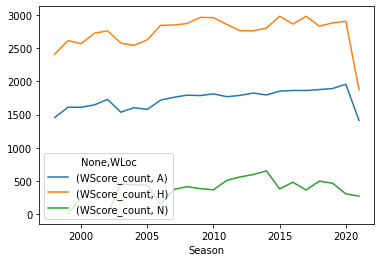

In [31]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [32]:
[file for file in women_comp if 'NCAATourneyCompact' in file]

['data/raw_women/WDataFiles_Stage2/WNCAATourneyCompactResults.csv',
 'data/raw_women/W2021_Stage1/WNCAATourneyCompactResults.csv']

In [33]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WNCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(1386, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


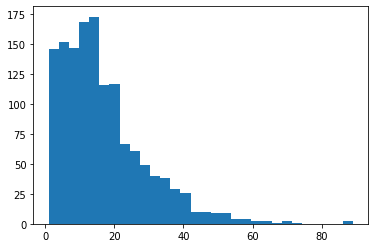

In [34]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [35]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1998,55,102,78.587302,77,39,80,63.396825,64,0,0,0.000000,0,1,53,15.190476,14
1999,53,113,76.444444,76,41,92,60.650794,61,0,0,0.000000,0,2,59,15.793651,13
2000,57,116,78.031746,77,38,85,61.634921,63,0,0,0.000000,0,1,71,16.396825,15
2001,51,104,79.444444,79,29,87,61.365079,63,0,0,0.000000,0,2,72,18.079365,15
2002,55,98,76.507937,76,35,79,59.111111,60,0,0,0.000000,0,1,49,17.396825,15
2003,50,95,72.507937,72,33,85,57.015873,57,0,0,0.000000,0,1,52,15.492063,13
2004,52,103,72.285714,71,42,85,57.952381,58,0,0,0.000000,0,1,52,14.333333,13
2005,58,97,73.126984,71,33,79,56.126984,57,0,0,0.000000,0,1,51,17.000000,12
2006,57,102,75.857143,75,27,75,59.920635,61,0,1,0.047619,0,2,69,15.936508,14


<AxesSubplot:xlabel='Season'>

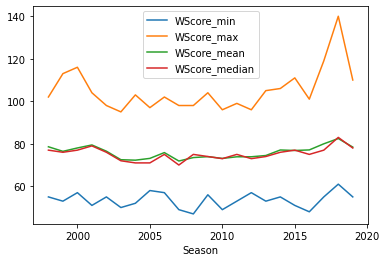

In [36]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

<AxesSubplot:xlabel='Season'>

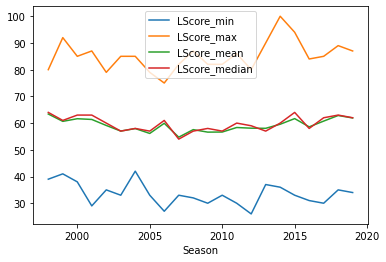

In [37]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

<AxesSubplot:xlabel='Season'>

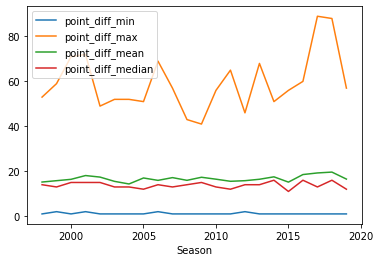

In [38]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

<AxesSubplot:xlabel='Season'>

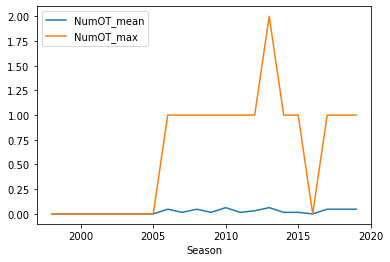

In [39]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [40]:
df.WLoc.value_counts()

N    699
H    554
A    133
Name: WLoc, dtype: int64

# Detailed results

In [41]:
[col for col in women_comp if 'Detailed' in col]

['data/raw_women/WDataFiles_Stage2/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv',
 'data/raw_women/W2021_Stage1/WNCAATourneyDetailedResults.csv',
 'data/raw_women/W2021_Stage1/WRegularSeasonDetailedResults.csv']

In [42]:
reg_season = pd.read_csv('data/raw_women/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(1386, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WOT_win,WAway,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wshtg_opportunity,WTO_perposs,WTrue_shooting_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lshtg_opportunity,LTO_perposs,LTrue_shooting_perc,Wdef_rating,Ldef_rating,Wopp_shtg_opportunity,Lopp_shtg_opportunity,Wopp_possessions,Lopp_possessions,Wopp_score,Lopp_score,Wopp_FTA,Wopp_FGA,Lopp_FTA,Lopp_FGA,Wimpact,Limpact,WDR_opportunity,LDR_opportunity,WOR_opportunity,LOR_opportunity,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,DR_opportunity_diff,OR_opportunity_diff,possessions_diff,off_rating_diff,def_rating_diff,shtg_opportunity_diff,TO_perposs_diff,impact_diff,True_shooting_perc_diff
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19,0,0,0.425926,18,45,0.400000,0.555556,0.631579,36,9,0.391304,71.025,88.701162,0.887364,0.253432,0.499802,0.370370,17,41,0.414634,0.230769,0.600000,38,9,0.450000,70.750,69.257951,0.830389,0.325088,0.417021,69.257951,88.701162,0.830389,0.887364,70.750,71.025,49,63,10,54,19,54,0.576744,0.423256,0.764706,0.870968,0.322581,0.323529,14,3,0,2,-4,6,9,-1,-1,3,-5,0,-6,-4,1,4,-2,0,-0.106262,-0.000949,0.275,19.443211,-19.443211,0.056975,-0.071656,0.153488,0.082780
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27,0,1,0.419355,21,50,0.420000,0.416667,0.571429,47,11,0.423077,79.300,92.055485,0.949559,0.252207,0.484728,0.396825,21,42,0.500000,0.190476,0.518519,40,18,0.720000,81.825,83.104186,0.926673,0.244424,0.448401,83.104186,92.055485,0.926673,0.949559,81.825,79.300,68,73,27,63,28,62,0.631579,0.368421,0.815789,0.722222,0.444444,0.368421,5,1,-1,1,-9,2,1,2,5,8,0,1,0,-2,0,8,7,-7,0.093567,0.076023,-2.525,8.951300,-8.951300,0.022886,0.007783,0.263158,0.036327
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15,0,1,0.467742,23,47,0.489362,0.400000,0.583333,37,11,0.379310,66.700,106.446777,1.014993,0.194903,0.524372,0.327586,17,44,0.386364,0.142857,0.826087,40,11,0.578947,66.925,88.158386,1.029884,0.224131,0.428001,88.158386,106.446777,1.029884,1.014993,66.925,66.700,59,71,23,58,12,62,0.604255,0.395745,0.589744,0.696970,0.424242,0.435897,12,10,4,4,1,-12,-11,-3,0,10,-2,0,2,2,6,3,-3,0,-0.107226,-0.011655,-0.225,18.288390,-18.288390,-0.014892,-0.029229,0.208511,0.096371
3,2010,11,3111,63,3267,58,A,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14,0,1,0.519231,23,41,0.560976,0.363636,0.555556,46,13,0.481481,77.275,81.527014,0.728243,0.349401,0.559751,0.243243,12,48,0.250000,0.230769,0.640000,44,3,0.166667,74.875,77.462437,1.146912,0.146912,0.337700,77.462437,81.527014,1.146912,0.728243,74.875,77.275,58,63,25,74,9,52,0.656126,0.343874,0.714286,0.880000,0.240000,0.392857,5,9,-22,-2,-15,-11,-16,-16,18,-1,16,-9,5,4,11,-7,2,10,-0.165714,-0.152857,2.400,4.064577,-4.064577,-0.418668,0.202490,0.312253,0.222051
4,2010,11,3119,74,3447,70,H,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14,1,0,0.405405,23,54,0.425926,0.350000,0.636364,47,12,0.400000,76.225,97.081010,1.039357,0.144310,0.467024,0.337838,16,57,0.280702,0.529412,0.523810,53,13,0.520000,76.975,90.938616,1.090939,0.181877,0.416791,90.938616,97.081010,1.090939,1.039357,76.975,76.225,70,74,21,74,11,74,0.562016,0.437984,0.673469,0.727273,0.318182,0.428571,4,5,0,-2,3,-4,-10,-7,1,6,-3,1,1,4,7,-3,-6,-1,-0.053803,-0.110390,-0.750,6.142394,-6.142394,-0.051581,-0.037568,0.124031,0.050234


In [43]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
2019   A             41         111    70.874802             70          1893   
2018   N             46         113    72.439516             72           496   
2012   H             41         120    70.191381             69          2738   
2015   N             43         106    70.317460             70           378   
       A             36         111    70.176026             70          1852   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
2019   A             28          98    58.230322           58.0          1893   
2018   N             21         109    58.578629           58.0           496   
2012   H             14          92    54.602995           54.0          2738   
2015   N             32          88    57.317460           57.0           378   
       A             21         101    58.045356           58.0          1852   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
2019   A             0          3    0.058109             0         1893   
2018   N             0          4    0.062500             0          496   
2012   H             0          3    0.040541             0         2738   
2015   N             0          2    0.034392             0          378   
       A             0          2    0.066955             0         1852   

             WFGM_min  WFGM_max  WFGM_mean  WFGM_median  WFGM_count  WFGA_min  \
Season WLoc                                                                     
2019   A           11        42  25.715795           25        1893        38   
2018   N           15        43  26.032258           26         496        34   
2012   H           12        48  25.252009           25        2738        30   
2015   N           12        39  25.023810           25         378        32   
       A           12        44  25.318035           25        1852        36   

             WFGA_max  WFGA_mean  WFGA_median  WFGA_count  WFGM3_min  \
Season WLoc                                                            
2019   A           91  58.845747           59        1893          0   
2018   N           94  58.786290           58         496          0   
2012   H           90  58.830168           58        2738          0   
2015   N           83  57.888889           57         378          0   
       A           99  58.213823           58        1852          0   

             WFGM3_max  WFGM3_mean  WFGM3_median  WFGM3_count  WFGA3_min  \
Season WLoc                                                                
2019   A            20    6.617010           6.0         1893          3   
2018   N            17    6.594758           6.0          496          3   
2012   H            17    5.460555           5.0         2738          1   
2015   N            18    5.719577           5.0          378          2   
       A            19    5.913607           6.0         1852          0   

             WFGA3_max  WFGA3_mean  WFGA3_median  WFGA3_count  WFTM_min  \
Season WLoc                                                               
2019   A            52   18.959324          19.0         1893         0   
2018   N            39   18.483871          18.0          496         2   
2012   H            47   15.900657          16.0         2738         0   
2015   N            42   16.333333          15.5          378         0   
       A            44   16.671706          16.0         1852         0   

             WFTM_max  WFTM_mean  WFTM_median  WFTM_count  WFTA_min  WFTA_max  \
Season WLoc                                                                     
2019   A           36  12.826202         13.0     

In [44]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean',
 'WTrue_shooting_perc_mean']

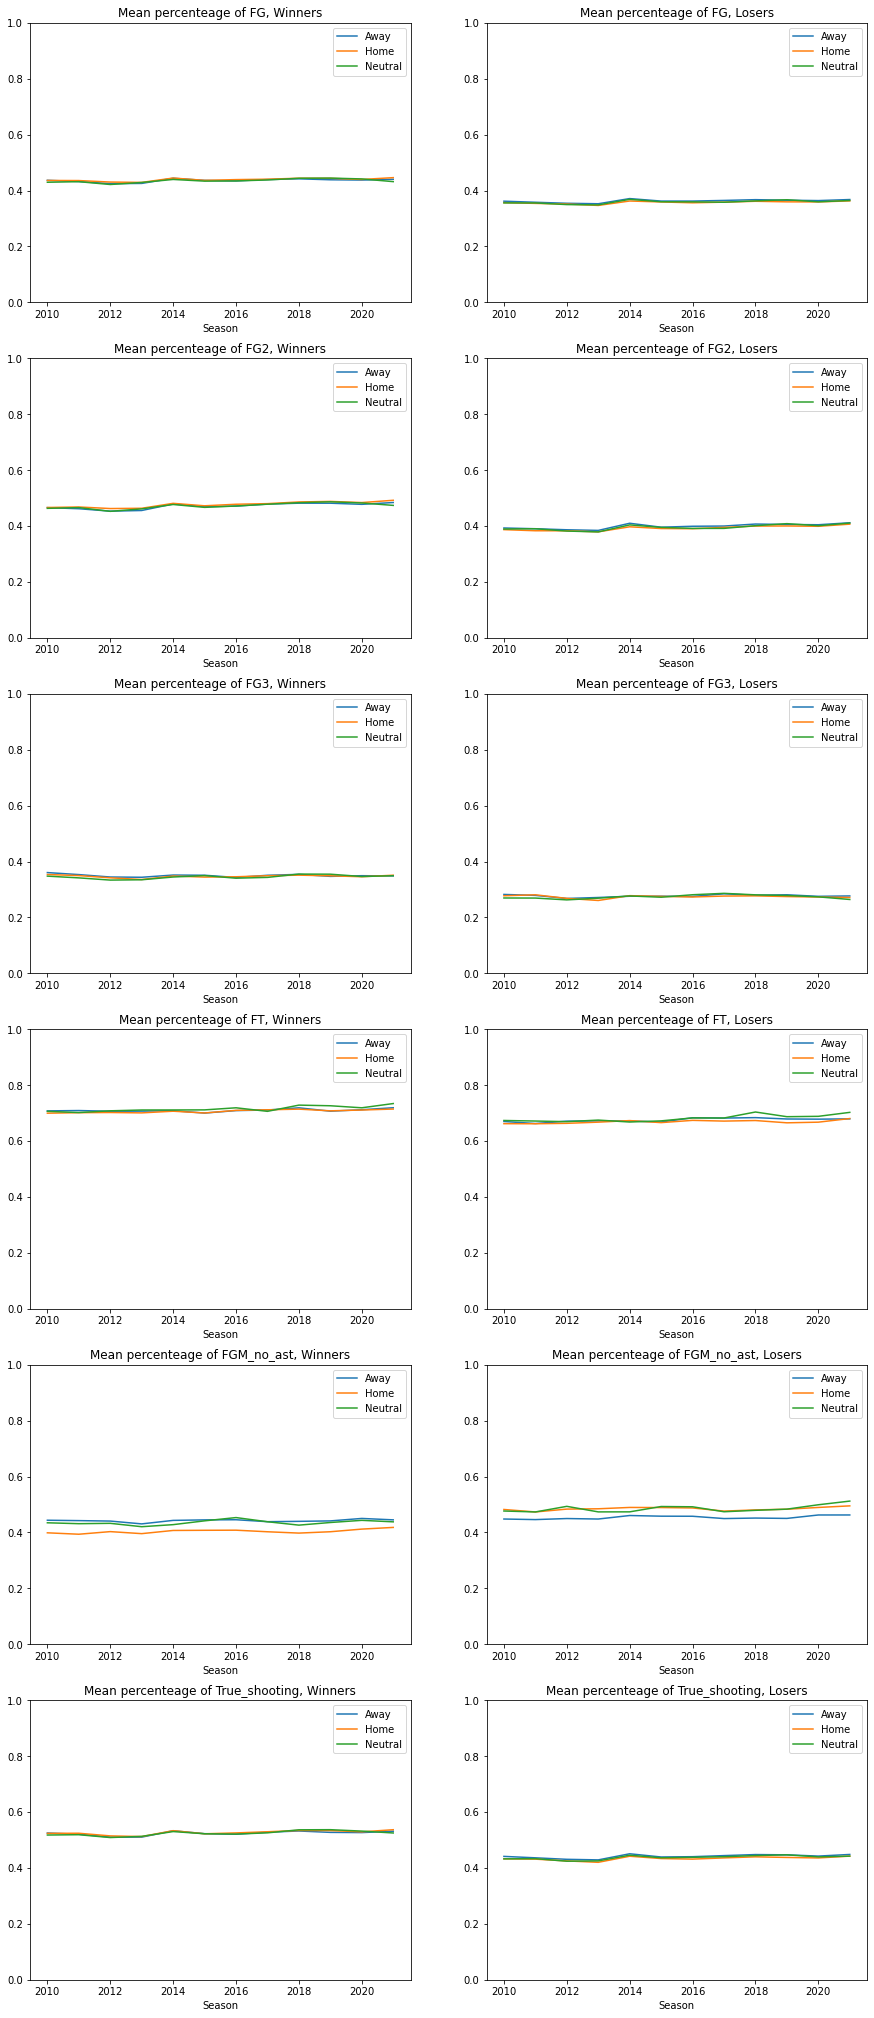

In [45]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

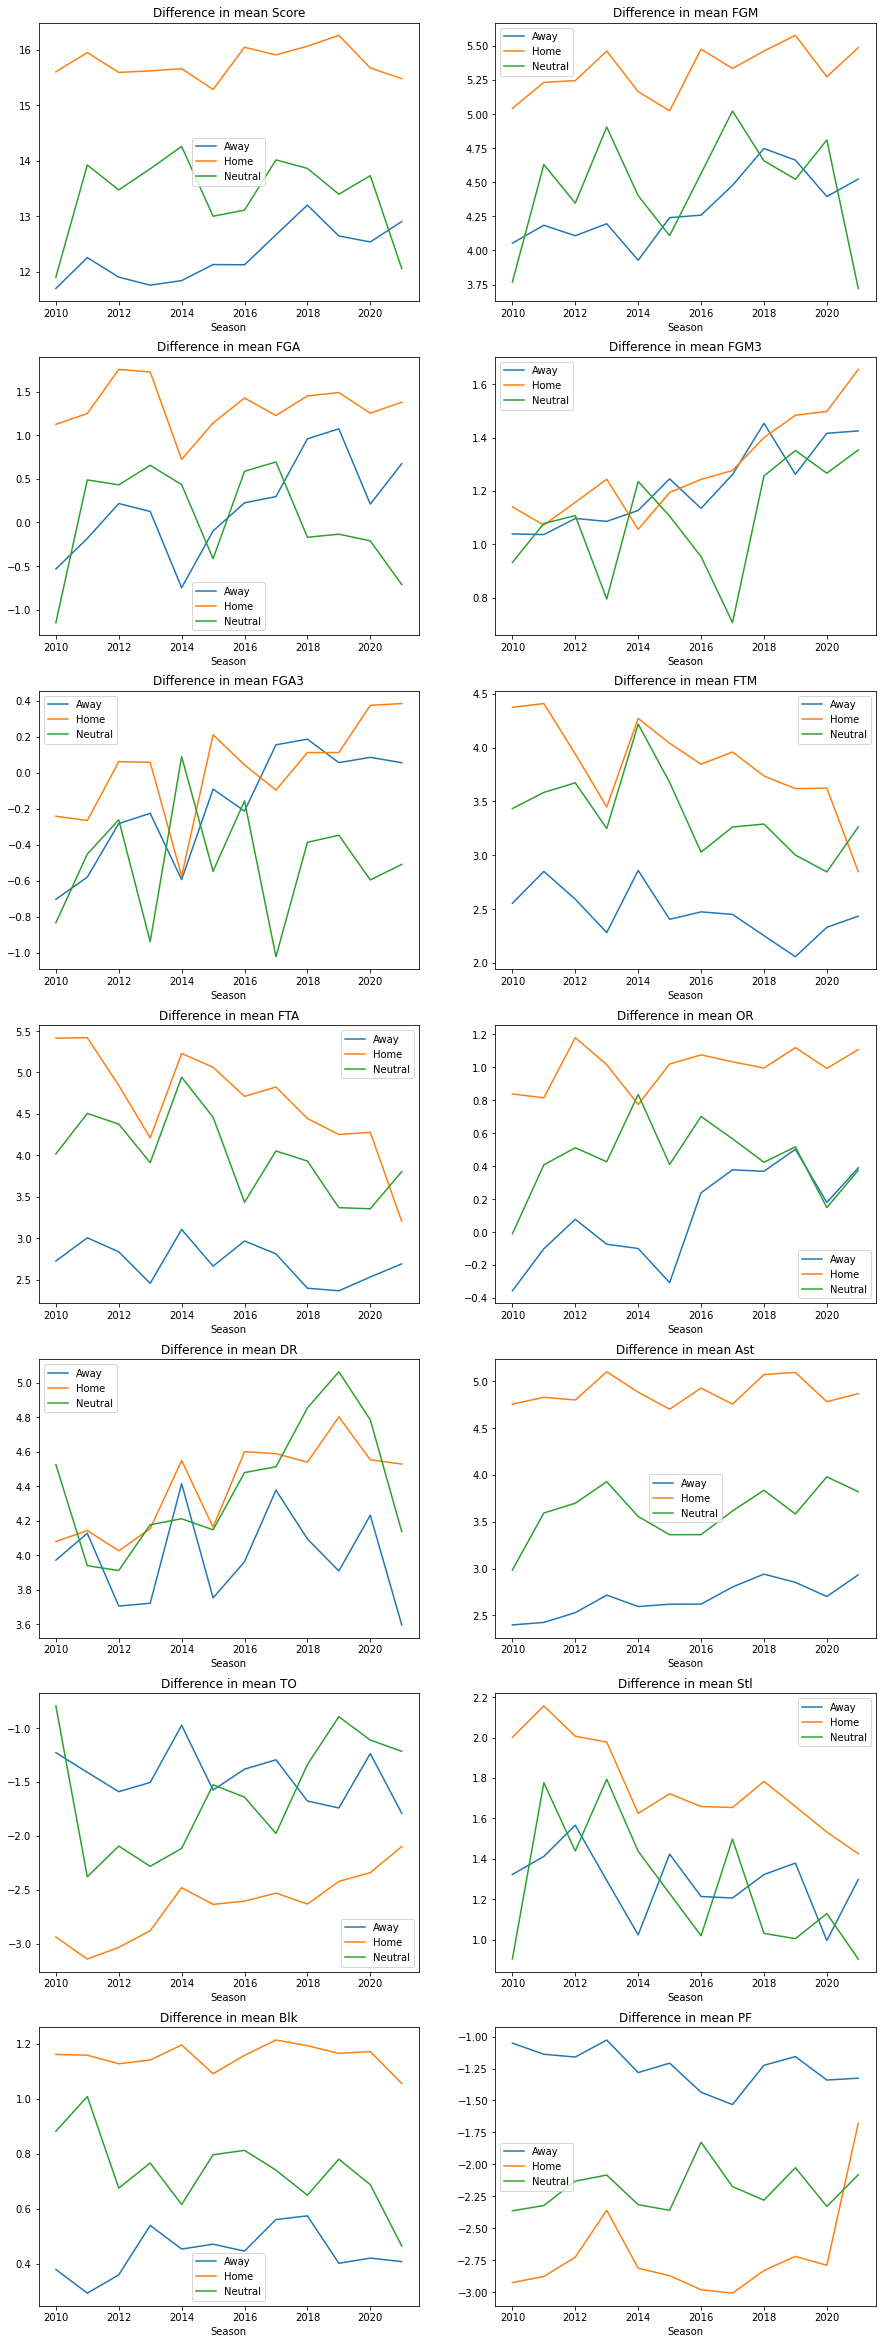

In [46]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [47]:
playoff = pd.read_csv('data/raw_women/WDataFiles_Stage2/WNCAATourneyDetailedResults.csv')

stats = [col for col in playoff.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

playoff= process_details(playoff)

playoff.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WOT_win,WAway,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wshtg_opportunity,WTO_perposs,WTrue_shooting_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lshtg_opportunity,LTO_perposs,LTrue_shooting_perc,Wdef_rating,Ldef_rating,Wopp_shtg_opportunity,Lopp_shtg_opportunity,Wopp_possessions,Lopp_possessions,Wopp_score,Lopp_score,Wopp_FTA,Wopp_FGA,Lopp_FTA,Lopp_FGA,Wimpact,Limpact,WDR_opportunity,LDR_opportunity,WOR_opportunity,LOR_opportunity,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,DR_opportunity_diff,OR_opportunity_diff,possessions_diff,off_rating_diff,def_rating_diff,shtg_opportunity_diff,TO_perposs_diff,impact_diff,True_shooting_perc_diff
0,2010,138,3124,69,3201,55,N,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18,0,1,0.491228,27,52,0.519231,0.200000,0.631579,37,6,0.214286,65.025,106.113033,1.015379,0.184544,0.522529,0.344262,11,27,0.407407,0.294118,0.600000,36,9,0.428571,64.375,85.436893,0.984466,0.279612,0.433925,85.436893,106.113033,0.984466,1.015379,64.375,65.025,55,69,5,61,19,57,0.673640,0.326360,0.600000,0.655172,0.448276,0.425000,14,7,-4,-9,-29,9,14,-4,5,10,-6,2,1,-6,16,25,1,-3,-0.055172,0.023276,0.650,20.676140,-20.676140,0.030913,-0.095067,0.347280,0.088604
1,2010,138,3173,67,3395,66,N,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22,0,1,0.389831,14,33,0.424242,0.346154,0.631579,47,10,0.434783,71.025,94.332981,0.957761,0.225273,0.492466,0.301370,14,46,0.304348,0.296296,0.933333,44,14,0.636364,70.125,94.117647,1.142602,0.114082,0.411856,94.117647,94.332981,1.142602,0.957761,70.125,71.025,66,67,15,73,19,59,0.608511,0.391489,0.666667,0.722222,0.361111,0.352941,1,1,-14,1,-1,-2,4,-5,8,5,8,-5,4,-8,0,-13,3,-4,-0.055556,0.008170,0.900,0.215334,-0.215334,-0.184841,0.111191,0.217021,0.080610
2,2010,138,3181,72,3214,37,H,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20,0,0,0.456140,22,44,0.500000,0.307692,0.727273,47,11,0.423077,65.450,110.007639,1.030558,0.168067,0.533729,0.267857,11,41,0.268293,0.266667,0.375000,31,11,0.733333,65.800,56.231003,0.908815,0.243161,0.309365,56.231003,110.007639,0.908815,1.030558,65.800,65.450,37,72,8,56,22,57,0.911765,0.088235,0.829268,0.677419,0.419355,0.243902,35,11,1,0,-2,13,14,3,13,11,-5,4,3,-9,11,3,16,0,0.151849,0.175452,-0.350,53.776636,-53.776636,0.121743,-0.075094,0.823529,0.224364
3,2010,138,3199,75,3256,61,H,0,25,63,3,15,22,26,20,27,13,17,8,3,21,21,62,2,20,17,22,16,21,13,16,5,4,24,0,0,0.396825,22,48,0.458333,0.200000,0.846154,47,12,0.480000,72.350,103.662751,1.041465,0.234969,0.497678,0.338710,19,42,0.452381,0.100000,0.772727,37,8,0.380952,72.450,84.195997,1.000000,0.220842,0.420980,84.195997,103.662751,1.000000,1.041465,72.450,72.350,61,75,22,62,26,63,0.641256,0.358744,0.658537,0.552632,0.526316,0.390244,14,4,1,1,-5,5,4,4,6,0,1,3,-1,-3,3,6,10,4,0.105905,0.136072,-0.100,19.466753,-19.466753,0.041465,0.014127,0.282511,0.076698
4,2010,138,3207,62,3265,42,N,0,24,68,8,25,6,8,20,29,16,8,5,5,18,13,60,5,26,11,17,16,22,9,10,3,4,12,0,1,0.352941,16,43,0.372093,0.320000,0.750000,49,8,0.333333,59.800,103.678930,1.200669,0.133779,0.431755,0.216667,8,34,0.235294,0.192308,0.647059,38,4,0.307692,62.075,67.660089,1.096657,0.161095,0.308483,67.660089,103.678930,1.096657,1.200669,62.075,59.800,42,62,17,60,8,68,0.742331,0.257669,0.617021,0.500000,0.454545,0.340426,20,11,8,3,-1,-5,-9,4,7,7,-2,2,1,6,8,9,11,4,0.117021,0.114120,-2.275,36.018841,-36.018841,0.104012,-0.027316,0.484663,0.123272


In [48]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WOT_win_min,WOT_win_max,WOT_win_mean,WOT_win_median,WOT_win_count,...,LDR_opportunity_min,LDR_opportunity_max,LDR_opportunity_mean,LDR_opportunity_median,LDR_opportunity_count,WOR_opportunity_min,WOR_opportunity_max,WOR_opportunity_mean,WOR_opportunity_median,WOR_opportunity_count,LOR_opportunity_min,LOR_opportunity_max,LOR_opportunity_mean,LOR_opportunity_median,LOR_opportunity_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,FGM_diff_min,FGM_diff_max,FGM_diff_mean,FGM_diff_median,FGM_diff_count,FGA_diff_min,FGA_diff_max,FGA_diff_mean,FGA_diff_median,FGA_diff_count,FGM3_diff_min,FGM3_diff_max,FGM3_diff_mean,FGM3_diff_median,FGM3_diff_count,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,DR_opportunity_diff_min,DR_opportunity_diff_max,DR_opportunity_diff_mean,DR_opportunity_diff_median,DR_opportunity_diff_count,OR_opportunity_diff_min,OR_opportunity_diff_max,OR_opportunity_diff_mean,OR_opportunity_diff_median,OR_opportunity_diff_count,possessions_diff_min,possessions_diff_max,possessions_diff_mean,possessions_diff_median,possessions_diff_count,off_rating_diff_min,off_rating_diff_max,off_rating_diff_mean,off_rating_diff_median,off_rating_diff_count,def_rating_diff_min,def_rating_diff_max,def_rating_diff_mean,def_rating_diff_median,def_rating_diff_count,shtg_opportunity_diff_min,shtg_opportunity_diff_max,shtg_opportunity_diff_mean,shtg_opportunity_diff_median,shtg_opportunity_diff_count,TO_perposs_diff_min,TO_perposs_diff_max,TO_perposs_diff_mean,TO_perposs_d

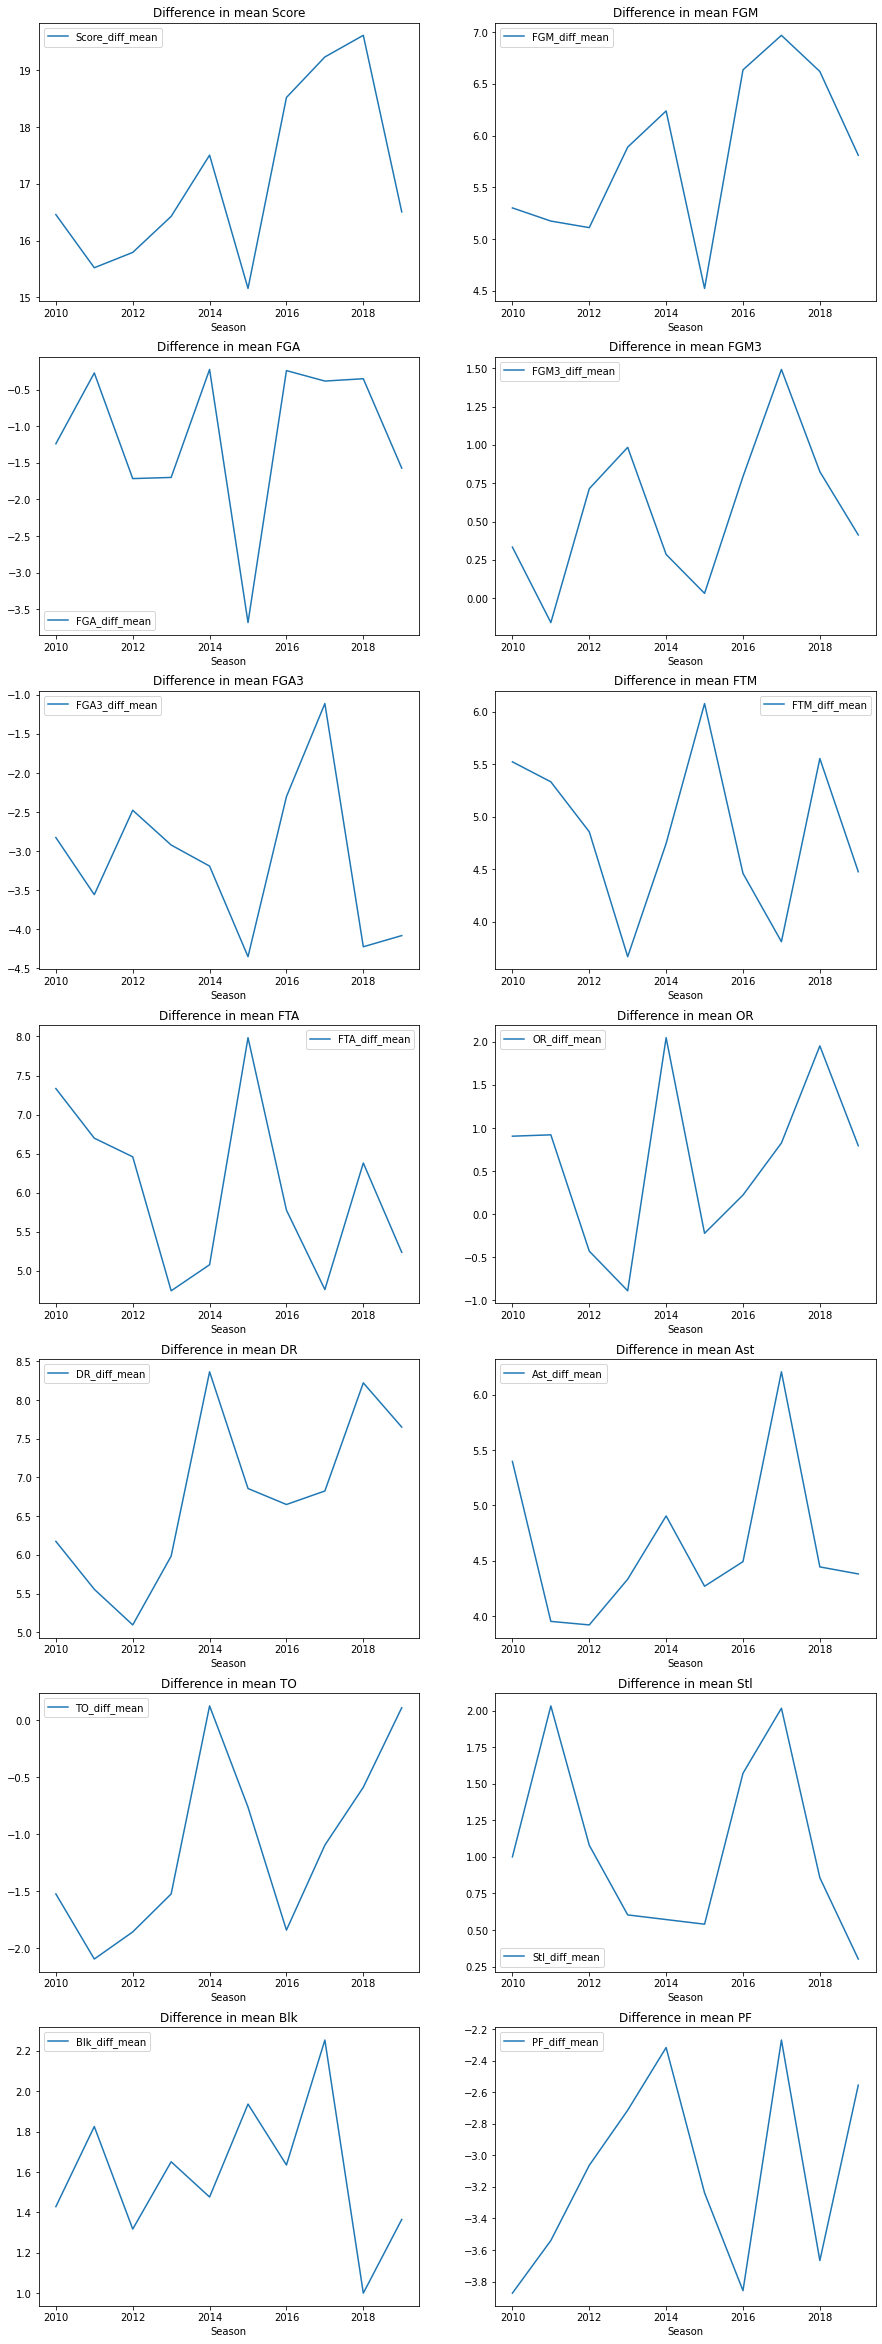

In [49]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

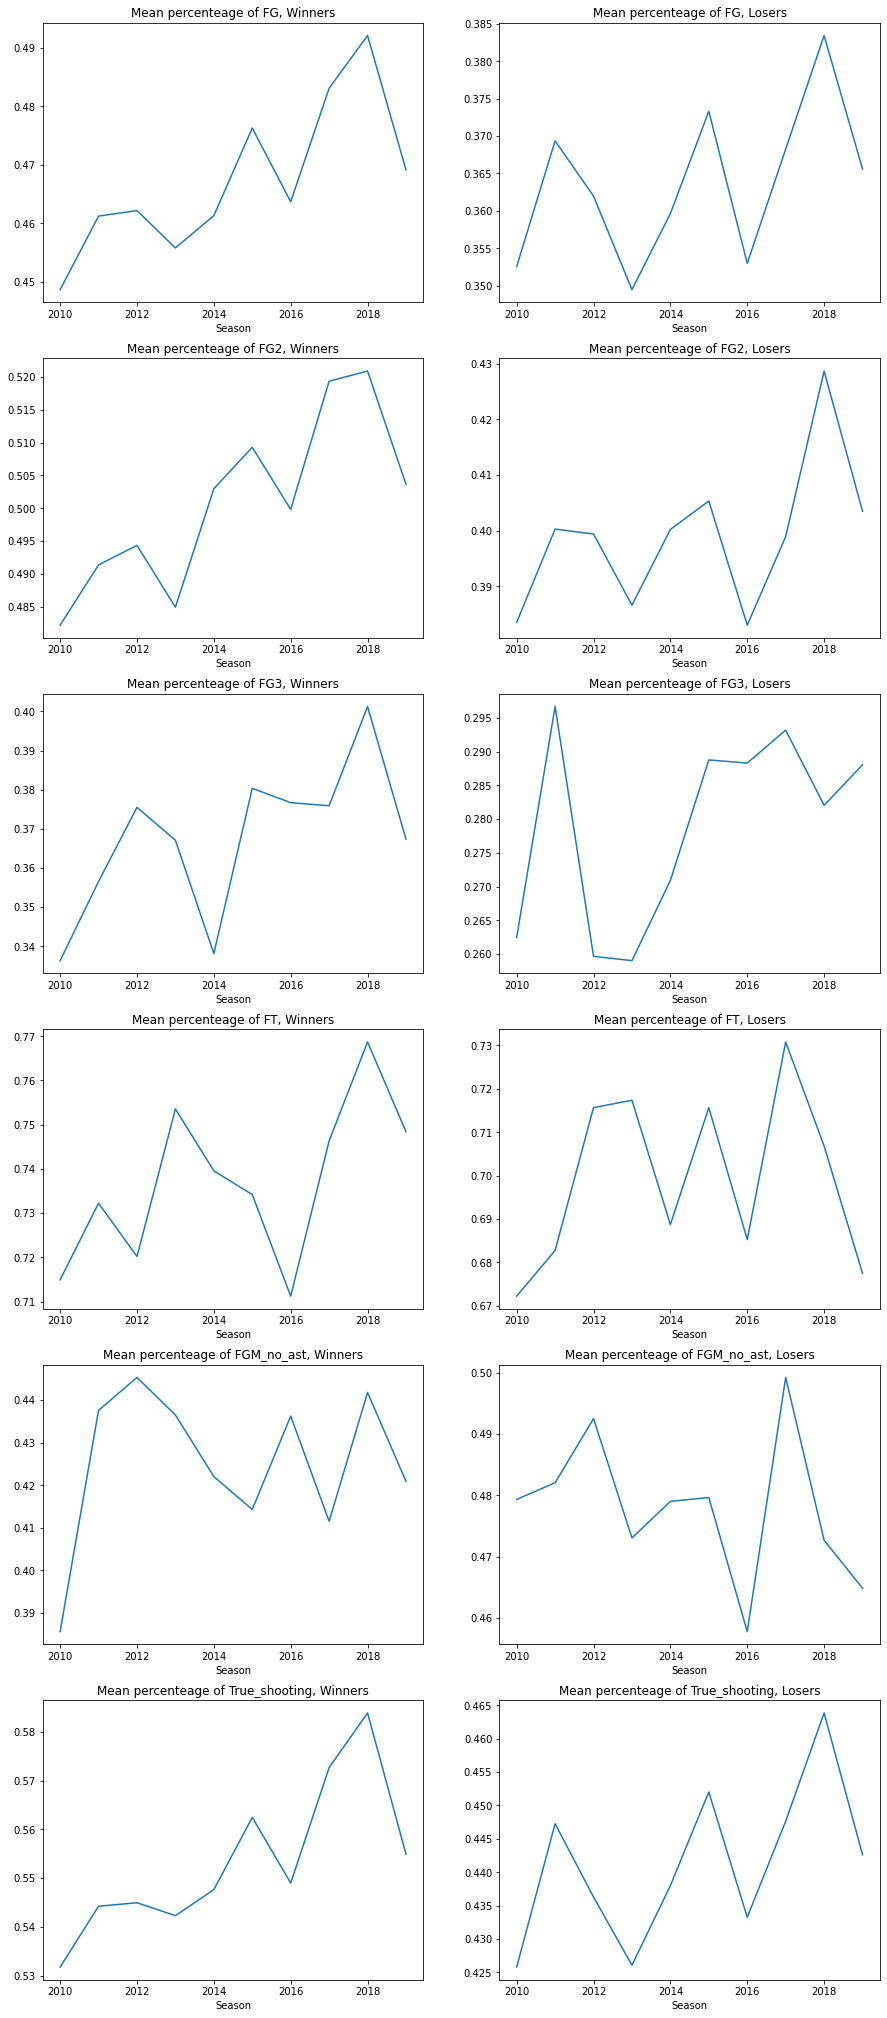

In [50]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    i += 1

# Seeds

In [51]:
[col for col in women_comp if 'Seed' in col]

['data/raw_women/WDataFiles_Stage2/WNCAATourneySeeds.csv',
 'data/raw_women/W2021_Stage1/WNCAATourneySeeds.csv']

In [52]:
seeds = pd.read_csv('data/raw_women/WDataFiles_Stage2/WNCAATourneySeeds.csv')
seeds.head()

,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


# Putting things together

In [53]:
reg_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WOT_win,WAway,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wshtg_opportunity,WTO_perposs,WTrue_shooting_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lshtg_opportunity,LTO_perposs,LTrue_shooting_perc,Wdef_rating,Ldef_rating,Wopp_shtg_opportunity,Lopp_shtg_opportunity,Wopp_possessions,Lopp_possessions,Wopp_score,Lopp_score,Wopp_FTA,Wopp_FGA,Lopp_FTA,Lopp_FGA,Wimpact,Limpact,WDR_opportunity,LDR_opportunity,WOR_opportunity,LOR_opportunity,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,DR_opportunity_diff,OR_opportunity_diff,possessions_diff,off_rating_diff,def_rating_diff,shtg_opportunity_diff,TO_perposs_diff,impact_diff,True_shooting_perc_diff
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19,0,0,0.425926,18,45,0.400000,0.555556,0.631579,36,9,0.391304,71.025,88.701162,0.887364,0.253432,0.499802,0.370370,17,41,0.414634,0.230769,0.600000,38,9,0.450000,70.750,69.257951,0.830389,0.325088,0.417021,69.257951,88.701162,0.830389,0.887364,70.750,71.025,49,63,10,54,19,54,0.576744,0.423256,0.764706,0.870968,0.322581,0.323529,14,3,0,2,-4,6,9,-1,-1,3,-5,0,-6,-4,1,4,-2,0,-0.106262,-0.000949,0.275,19.443211,-19.443211,0.056975,-0.071656,0.153488,0.082780
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27,0,1,0.419355,21,50,0.420000,0.416667,0.571429,47,11,0.423077,79.300,92.055485,0.949559,0.252207,0.484728,0.396825,21,42,0.500000,0.190476,0.518519,40,18,0.720000,81.825,83.104186,0.926673,0.244424,0.448401,83.104186,92.055485,0.926673,0.949559,81.825,79.300,68,73,27,63,28,62,0.631579,0.368421,0.815789,0.722222,0.444444,0.368421,5,1,-1,1,-9,2,1,2,5,8,0,1,0,-2,0,8,7,-7,0.093567,0.076023,-2.525,8.951300,-8.951300,0.022886,0.007783,0.263158,0.036327
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15,0,1,0.467742,23,47,0.489362,0.400000,0.583333,37,11,0.379310,66.700,106.446777,1.014993,0.194903,0.524372,0.327586,17,44,0.386364,0.142857,0.826087,40,11,0.578947,66.925,88.158386,1.029884,0.224131,0.428001,88.158386,106.446777,1.029884,1.014993,66.925,66.700,59,71,23,58,12,62,0.604255,0.395745,0.589744,0.696970,0.424242,0.435897,12,10,4,4,1,-12,-11,-3,0,10,-2,0,2,2,6,3,-3,0,-0.107226,-0.011655,-0.225,18.288390,-18.288390,-0.014892,-0.029229,0.208511,0.096371
3,2010,11,3111,63,3267,58,A,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14,0,1,0.519231,23,41,0.560976,0.363636,0.555556,46,13,0.481481,77.275,81.527014,0.728243,0.349401,0.559751,0.243243,12,48,0.250000,0.230769,0.640000,44,3,0.166667,74.875,77.462437,1.146912,0.146912,0.337700,77.462437,81.527014,1.146912,0.728243,74.875,77.275,58,63,25,74,9,52,0.656126,0.343874,0.714286,0.880000,0.240000,0.392857,5,9,-22,-2,-15,-11,-16,-16,18,-1,16,-9,5,4,11,-7,2,10,-0.165714,-0.152857,2.400,4.064577,-4.064577,-0.418668,0.202490,0.312253,0.222051
4,2010,11,3119,74,3447,70,H,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14,1,0,0.405405,23,54,0.425926,0.350000,0.636364,47,12,0.400000,76.225,97.081010,1.039357,0.144310,0.467024,0.337838,16,57,0.280702,0.529412,0.523810,53,13,0.520000,76.975,90.938616,1.090939,0.181877,0.416791,90.938616,97.081010,1.090939,1.039357,76.975,76.225,70,74,21,74,11,74,0.562016,0.437984,0.673469,0.727273,0.318182,0.428571,4,5,0,-2,3,-4,-10,-7,1,6,-3,1,1,4,7,-3,-6,-1,-0.053803,-0.110390,-0.750,6.142394,-6.142394,-0.051581,-0.037568,0.124031,0.050234


In [54]:
reg_s = full_stats(reg_season)
reg_s.head()

,Season,TeamID,Ast,Ast_diff,Away,Blk,Blk_diff,DR,DR_diff,DR_opportunity,DR_opportunity_diff,FGA,FGA2,FGA2_diff,FGA3,FGA3_diff,FGA_diff,FGM,FGM2,FGM2_diff,FGM3,FGM3_diff,FGM_diff,FGM_no_ast,FGM_no_ast_diff,FTA,FTA_diff,FTM,FTM_diff,N_wins,OR,OR_diff,OR_opportunity,OR_opportunity_diff,OT_win,PF,PF_diff,Score,Score_diff,Stl,Stl_diff,TO,TO_diff,TO_perposs,TO_perposs_diff,Tot_Reb,Tot_Reb_diff,True_shooting_perc_diff,def_rating,def_rating_diff,impact,impact_diff,off_rating,off_rating_diff,opp_FGA,opp_FTA,opp_possessions,opp_score,opp_shtg_opportunity,possessions,possessions_diff,shtg_opportunity,shtg_opportunity_diff,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc,True_shooting_perc,Opp_True_shooting_perc,OT_win_perc
0,2010,3102,10.250000,-9.285714,0.000000,0.642857,-4.392857,19.535714,-4.321429,0.673014,-0.028518,53.142857,37.071429,1.178571,16.071429,-4.428571,-3.250000,19.142857,14.571429,-4.714286,4.571429,-3.142857,-7.857143,8.892857,1.428571,13.214286,-1.678571,8.964286,-1.107143,0.035714,12.464286,-0.357143,0.370681,-0.061659,0.000000,14.964286,1.357143,51.821429,-19.964286,6.035714,-3.785714,17.714286,3.321429,0.270515,0.049659,32.000000,-4.678571,-0.132567,110.868214,30.652379,0.322078,-0.355844,80.215834,-30.652379,56.392857,14.892857,65.038393,71.785714,0.975644,64.669643,-0.368750,0.922159,-0.053485,0.360215,0.393064,0.284444,0.678378,0.464552,0.436063,0.565536,0.0
1,2010,3103,13.433333,1.733333,0.200000,2.400000,-1.400000,23.566667,1.966667,0.696367,0.032045,55.266667,42.800000,3.000000,12.466667,-2.700000,0.300000,22.233333,18.300000,2.166667,3.933333,-0.900000,1.266667,8.800000,-0.466667,19.600000,0.766667,13.833333,0.966667,0.566667,14.200000,0.566667,0.424251,0.020809,0.033333,17.533333,-0.100000,62.233333,2.600000,8.033333,-1.200000,18.266667,-0.433333,0.267045,-0.003345,37.766667,2.533333,0.017132,86.688992,-4.206526,0.531965,0.063930,90.895518,4.206526,54.966667,18.833333,68.979167,59.633333,0.928508,68.643333,-0.335833,0.939204,0.010696,0.402292,0.427570,0.315508,0.705782,0.395802,0.481856,0.466523,1.0
2,2010,3104,13.103448,0.586207,0.172414,2.931034,-0.655172,25.931034,-0.551724,0.720761,0.008338,62.103448,47.379310,3.758621,14.724138,-1.793103,1.965517,24.724138,20.379310,1.586207,4.344828,-0.758621,0.827586,11.620690,0.241379,16.793103,-5.172414,10.344828,-3.758621,0.379310,14.482759,-0.379310,0.389014,-0.024404,0.000000,20.413793,4.000000,64.137931,-2.862069,7.379310,-1.379310,19.172414,-0.068966,0.255714,-0.002366,40.413793,-0.931034,-0.015688,89.521383,3.891863,0.462641,-0.074718,85.629519,-3.891863,60.137931,21.965517,74.950862,67.000000,0.942390,74.769828,-0.181034,0.938353,-0.004036,0.398112,0.430131,0.295082,0.616016,0.470014,0.457604,0.474696,0.0
3,2010,3105,9.740741,-3.740741,0.259259,5.148148,0.740741,23.370370,2.074074,0.682798,-0.028840,50.851852,40.962963,-3.777778,9.888889,-2.888889,-6.666667,20.370370,17.333333,-1.703704,3.037037,-0.703704,-2.407407,10.629630,1.333333,24.333333,0.814815,17.000000,1.555556,0.518519,13.666667,-1.518519,0.445119,0.006932,0.000000,19.148148,-1.814815,60.777778,-3.962963,8.777778,-3.444444,25.037037,4.296296,0.338842,0.059968,37.037037,0.555556,0.017315,87.515924,5.124221,0.493600,-0.012801,82.391703,-5.124221,57.518519,23.518519,74.245370,64.740741,0.926718,73.780556,-0.464815,0.847267,-0.079451,0.400583,0.423146,0.307116,0.698630,0.521818,0.486922,0.471254,0.0
4,2010,3106,11.482759,1.965517,0.172414,4.482759,0.517241,24.758621,1.344828,0.766965,0.080433,53.000000,43.413793,4.551724,9.586207,-2.241379,2.310345,18.448276,15.758621,1.586207,2.689655,-1.034483,0.551724,6.965517,-1.413793,24.000000,-2.655172,15.551724,-2.344828,0.413793,15.000000,2.620690,0.436225,0.063875,0.034483,22.068966,2.000000,55.137931,-2.275862,8.034483,-0.758621,20.103448,1.793103,0.287325,0.022462,39.758621,3.965517,-0.022940,82.527233,3.062637,0.498807,-0.002387,79.464596,-3.062637,50.689655,26.655172,69.281897,57.413793,0.915603,69.503448,0.221552,0.929949,0.014346,0.348081,0.362986,0

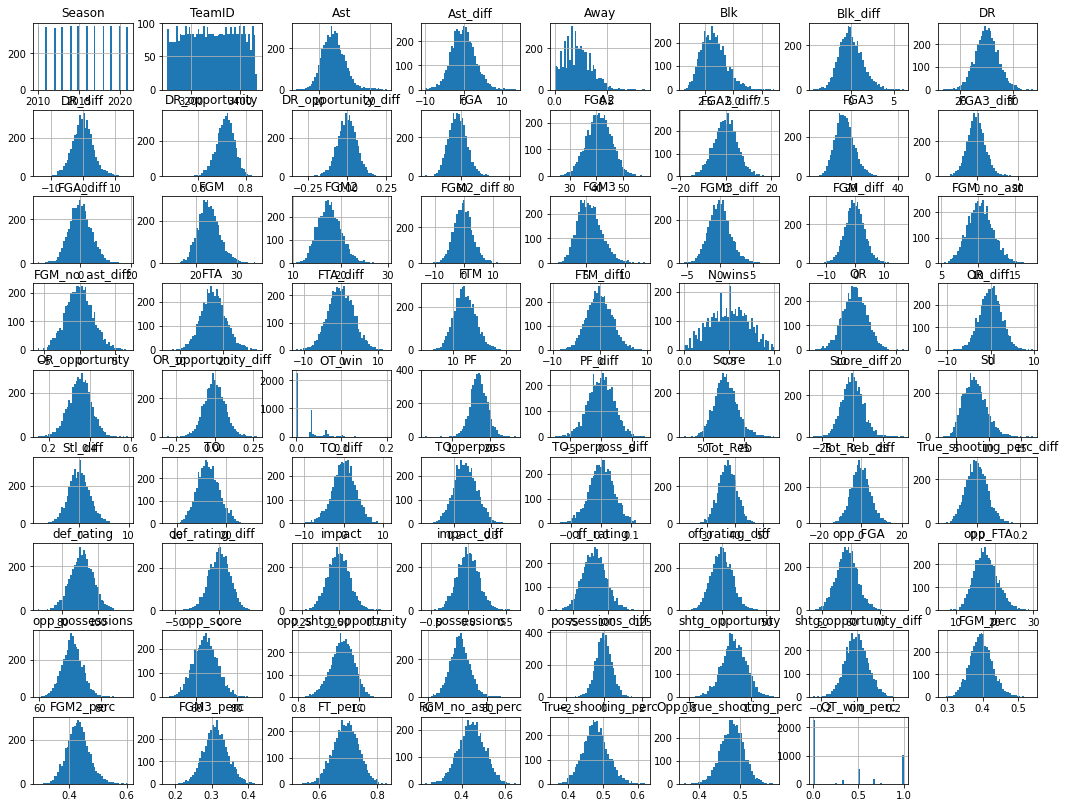

In [55]:
reg_s.hist(bins=50, figsize=(18, 14))
plt.show()

In [56]:
summary_reg = reg_s.groupby('Season')[[col for col in reg_s if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

,Ast_mean,Ast_max,Ast_min,Ast_diff_mean,Ast_diff_max,Ast_diff_min,Away_mean,Away_max,Away_min,Blk_mean,Blk_max,Blk_min,Blk_diff_mean,Blk_diff_max,Blk_diff_min,DR_mean,DR_max,DR_min,DR_diff_mean,DR_diff_max,DR_diff_min,DR_opportunity_mean,DR_opportunity_max,DR_opportunity_min,DR_opportunity_diff_mean,DR_opportunity_diff_max,DR_opportunity_diff_min,FGA_mean,FGA_max,FGA_min,FGA2_mean,FGA2_max,FGA2_min,FGA2_diff_mean,FGA2_diff_max,FGA2_diff_min,FGA3_mean,FGA3_max,FGA3_min,FGA3_diff_mean,FGA3_diff_max,FGA3_diff_min,FGA_diff_mean,FGA_diff_max,FGA_diff_min,FGM_mean,FGM_max,FGM_min,FGM2_mean,FGM2_max,FGM2_min,FGM2_diff_mean,FGM2_diff_max,FGM2_diff_min,FGM3_mean,FGM3_max,FGM3_min,FGM3_diff_mean,FGM3_diff_max,FGM3_diff_min,FGM_diff_mean,FGM_diff_max,FGM_diff_min,FGM_no_ast_mean,FGM_no_ast_max,FGM_no_ast_min,FGM_no_ast_diff_mean,FGM_no_ast_diff_max,FGM_no_ast_diff_min,FTA_mean,FTA_max,FTA_min,FTA_diff_mean,FTA_diff_max,FTA_diff_min,FTM_mean,FTM_max,FTM_min,FTM_diff_mean,FTM_diff_max,FTM_diff_min,N_wins_mean,N_wins_max,N_wins_min,OR_mean,OR_max,OR_min,OR_diff_mean,OR_diff_max,OR_diff_min,OR_opportunity_mean,OR_opportunity_max,OR_opportunity_min,OR_opportunity_diff_mean,OR_opportunity_diff_max,OR_opportunity_diff_min,OT_win_mean,OT_win_max,OT_win_min,PF_mean,PF_max,PF_min,PF_diff_mean,PF_diff_max,PF_diff_min,Score_mean,Score_max,Score_min,Score_diff_mean,Score_diff_max,Score_diff_min,Stl_mean,Stl_max,Stl_min,Stl_diff_mean,Stl_diff_max,Stl_diff_min,TO_mean,TO_max,TO_min,TO_diff_mean,TO_diff_max,TO_diff_min,TO_perposs_mean,TO_perposs_max,TO_perposs_min,TO_perposs_diff_mean,TO_perposs_diff_max,TO_perposs_diff_min,Tot_Reb_mean,Tot_Reb_max,Tot_Reb_min,Tot_Reb_diff_mean,Tot_Reb_diff_max,Tot_Reb_diff_min,True_shooting_perc_diff_mean,True_shooting_perc_diff_max,True_shooting_perc_diff_min,def_rating_mean,def_rating_max,def_rating_min,def_rating_diff_mean,def_rating_diff_max,def_rating_diff_min,impact_mean,impact_max,impact_min,impact_diff_mean,impact_diff_max,impact_diff_min,off_rating_mean,off_rating_max,off_rating_min,off_rating_diff_mean,off_rating_diff_max,off_rating_diff_min,opp_FGA_mean,opp_FGA_max,opp_FGA_min,opp_FTA_mean,opp_FTA_max,opp_FTA_min,opp_possessions_mean,opp_possessions_max,opp_possessions_min,opp_score_mean,opp_score_max,opp_score_min,opp_shtg_opportunity_mean,opp_shtg_opportunity_max,opp_shtg_opportunity_min,possessions_mean,possessions_max,possessions_min,possessions_diff_mean,possessions_diff_max,possessions_diff_min,shtg_opportunity_mean,shtg_opportunity_max,shtg_opportunity_min,shtg_opportunity_diff_mean,shtg_opportunity_diff_max,shtg_opportunity_diff_min,FGM_perc_mean,FGM_perc_max,FGM_perc_min,FGM2_perc_mean,FGM2_perc_max,FGM2_perc_min,FGM3_perc_mean,FGM3_perc_max,FGM3_perc_min,FT_perc_mean,FT_perc_max,FT_perc_min,FGM_no_ast_perc_mean,FGM_no_ast_perc_max,FGM_no_ast_perc_min,True_shooting_perc_mean,True_shooting_perc_max,True_shooting_perc_min,Opp_True_shooting_perc_mean,Opp_True_shooting_perc_max,Opp_True_shooting_perc_min,OT_win_perc_mean,OT_win_perc_max,OT_win_perc_min
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,12.684878,19.468750,6.142857,-0.079888,10.718750,-9.285714,0.207996,0.516129,0.0,3.251082,7.250000,0.642857,-0.021664,5.375000,-4.392857,24.537901,31.062500,18.964286,-0.069158,11.343750,-9.928571,0.712768,0.806634,0.617072,-0.001085,0.194867,-0.165550,57.450312,72.857143,45.466667,41.183868,53.172414,25.233333,-0.044355,12.633333,-17.000000,16.266444,29.620690,7.681818,-0.014081,15.866667,-11.296296,-0.058437,11.400000,-13.096774,22.693045,31.870968,16.172414,17.515063,27.000000,11.300000,-0.082725,11.687500,-10.433333,5.177982,10.333333,1.909091,-0.019929,5.966667,-3.444444,-0.102654,13.250000,-11.933333,10.008166,14.566667,5.566667,-0.022765,6.586207,-4.066667,18.609178,27.400000,8.533333,-0.067284,11.266667,-9.172414,12.777960,20.480000

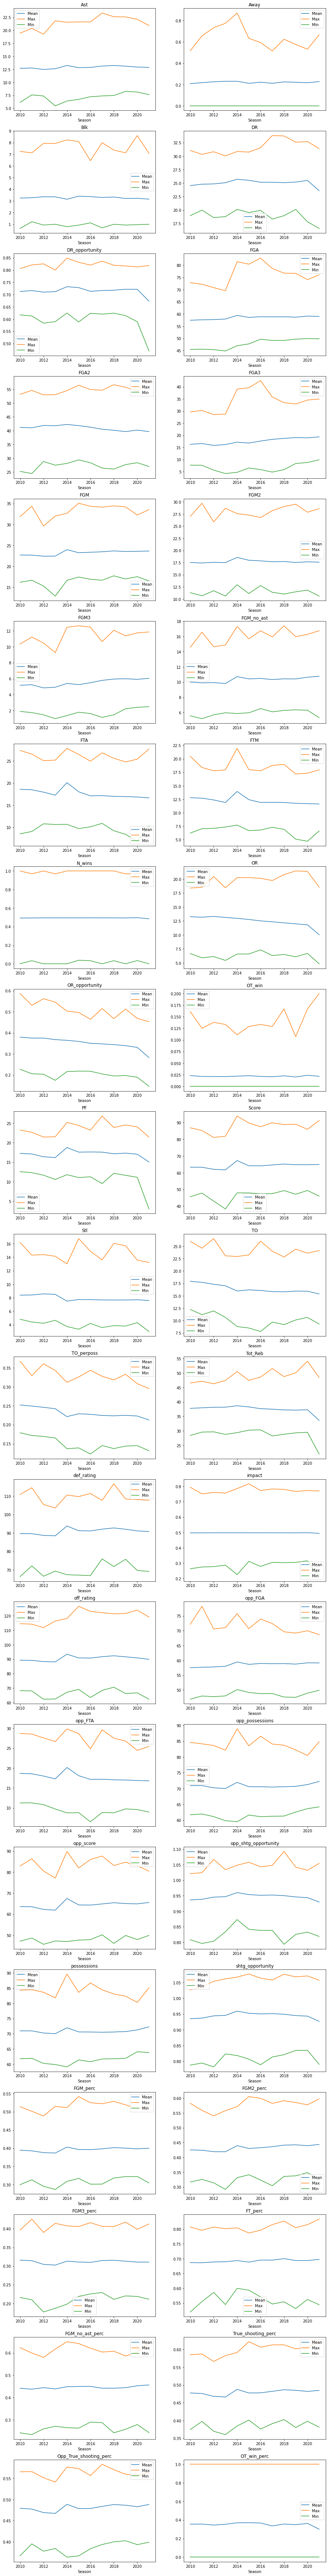

In [57]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col and 'advantage' not in col]

fig, ax= plt.subplots(int(np.ceil(len(stats)/2)),2, figsize=(15, 6*int(np.ceil((len(stats)/2)))))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

# Exploring training data (from Notebook 3) 

In [58]:
df = pd.read_csv('data/processed_women/training_data.csv')

df = df[[col for col in df if 'L2W' not in col]].copy()

df.head()

,Season,DayNum,Team1,Team2,target,target_points,T1_Loc,T2_Loc,ID,T1_Ast,T1_Ast_diff,T1_Away,T1_Blk,T1_Blk_diff,T1_DR,T1_DR_diff,T1_DR_opportunity,T1_DR_opportunity_diff,T1_FGA,T1_FGA2,T1_FGA2_diff,T1_FGA3,T1_FGA3_diff,T1_FGA_diff,T1_FGM,T1_FGM2,T1_FGM2_diff,T1_FGM3,T1_FGM3_diff,T1_FGM_diff,T1_FGM_no_ast,T1_FGM_no_ast_diff,T1_FTA,T1_FTA_diff,T1_FTM,T1_FTM_diff,T1_N_wins,T1_OR,T1_OR_diff,T1_OR_opportunity,T1_OR_opportunity_diff,T1_OT_win,T1_PF,T1_PF_diff,T1_Score,T1_Score_diff,T1_Stl,T1_Stl_diff,T1_TO,T1_TO_diff,T1_TO_perposs,T1_TO_perposs_diff,T1_Tot_Reb,T1_Tot_Reb_diff,T1_True_shooting_perc_diff,T1_def_rating,T1_def_rating_diff,T1_impact,T1_impact_diff,T1_off_rating,T1_off_rating_diff,T1_opp_FGA,T1_opp_FTA,T1_opp_possessions,T1_opp_score,T1_opp_shtg_opportunity,T1_possessions,T1_possessions_diff,T1_shtg_opportunity,T1_shtg_opportunity_diff,T1_FGM_perc,T1_FGM2_perc,T1_FGM3_perc,T1_FT_perc,T1_FGM_no_ast_perc,T1_True_shooting_perc,T1_Opp_True_shooting_perc,T1_OT_win_perc,T1_Seed,T1_high_seed,T1_low_seed,T2_Ast,T2_Ast_diff,T2_Away,T2_Blk,T2_Blk_diff,T2_DR,T2_DR_diff,T2_DR_opportunity,T2_DR_opportunity_diff,T2_FGA,T2_FGA2,T2_FGA2_diff,T2_FGA3,T2_FGA3_diff,T2_FGA_diff,T2_FGM,T2_FGM2,T2_FGM2_diff,T2_FGM3,T2_FGM3_diff,T2_FGM_diff,T2_FGM_no_ast,T2_FGM_no_ast_diff,T2_FTA,T2_FTA_diff,T2_FTM,T2_FTM_diff,T2_N_wins,T2_OR,T2_OR_diff,T2_OR_opportunity,T2_OR_opportunity_diff,T2_OT_win,T2_PF,T2_PF_diff,T2_Score,T2_Score_diff,T2_Stl,T2_Stl_diff,T2_TO,T2_TO_diff,T2_TO_perposs,T2_TO_perposs_diff,T2_Tot_Reb,T2_Tot_Reb_diff,T2_True_shooting_perc_diff,T2_def_rating,T2_def_rating_diff,T2_impact,T2_impact_diff,T2_off_rating,T2_off_rating_diff,T2_opp_FGA,T2_opp_FTA,T2_opp_possessions,T2_opp_score,T2_opp_shtg_opportunity,T2_possessions,T2_possessions_diff,T2_shtg_opportunity,T2_shtg_opportunity_diff,T2_FGM_perc,T2_FGM2_perc,T2_FGM3_perc,T2_FT_perc,T2_FGM_no_ast_perc,T2_True_shooting_perc,T2_Opp_True_shooting_perc,T2_OT_win_perc,T2_Seed,T2_high_seed,T2_low_seed,delta_Loc,delta_Ast,delta_Ast_diff,delta_Away,delta_Blk,delta_Blk_diff,delta_DR,delta_DR_diff,delta_DR_opportunity,delta_DR_opportunity_diff,delta_FGA,delta_FGA2,delta_FGA2_diff,delta_FGA3,delta_FGA3_diff,delta_FGA_diff,delta_FGM,delta_FGM2,delta_FGM2_diff,delta_FGM3,delta_FGM3_diff,delta_FGM_diff,delta_FGM_no_ast,delta_FGM_no_ast_diff,delta_FTA,delta_FTA_diff,delta_FTM,delta_FTM_diff,delta_N_wins,delta_OR,delta_OR_diff,delta_OR_opportunity,delta_OR_opportunity_diff,delta_OT_win,delta_PF,delta_PF_diff,delta_Score,delta_Score_diff,delta_Stl,delta_Stl_diff,delta_TO,delta_TO_diff,delta_TO_perposs,delta_TO_perposs_diff,delta_Tot_Reb,delta_Tot_Reb_diff,delta_True_shooting_perc_diff,delta_def_rating,delta_def_rating_diff,delta_impact,delta_impact_diff,delta_off_rating,delta_off_rating_diff,delta_opp_FGA,delta_opp_FTA,delta_opp_possessions,delta_opp_score,delta_opp_shtg_opportunity,delta_possessions,delta_possessions_diff,delta_shtg_opportunity,delta_shtg_opportunity_diff,delta_FGM_perc,delta_FGM2_perc,delta_FGM3_perc,delta_FT_perc,delta_FGM_no_ast_perc,delta_True_shooting_perc,delta_Opp_True_shooting_perc,delta_OT_win_perc,delta_Seed,delta_high_seed,delta_low_seed,delta_off_edge,delta_def_edge,stage_Round1,stage_Round2,stage_Round3,stage_Round4,stage_final,stage_finalfour,T1_quality,T2_quality
0,2010,138,3124,3201,1,14,0,0,2010_3124_3201,14.687500,5.187500,0.250000,7.250000,5.375000,31.062500,9.281250,0.752087,0.030446,56.343750,47.687500,5.000000,8.656250,-11.281250,-6.281250,26.093750,23.625000,8.031250,2.468750,-3.062500,4.968750,11.406250,-0.218750,24.000000,10.812500,17.437500,8.375000,0.718750,12.187500,-0.500000,0.416298,0.110042,0.000000,14.125000,-5.125000,72.093750,15.250000,6.968750,0.312500,16.875000,1.156250,0.231303,0.015391,43.250000,8.781250,0.118636,79.729697,-19.571649,0.686364,0.372728,99.301346,19.571649,62.625000,13.187500,71.920313,56.843750,0.962811,72.431250,0.510937,0.937757,-0.025054,0.463117,0.495413,0.285199,0.726562,0.437126,0.532106,0.412575,0.0,4.0,0.384615,0.947368,14.6363

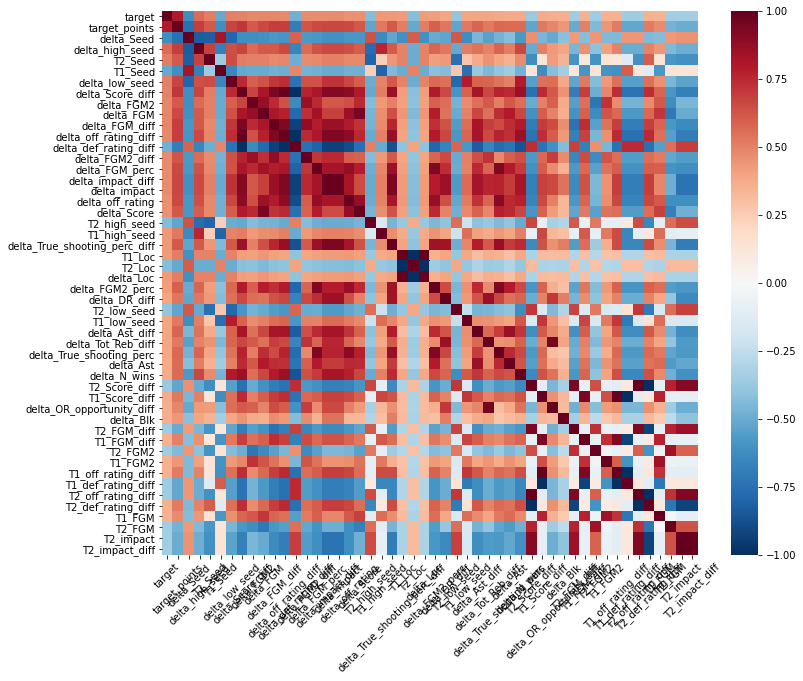

In [60]:
high_corr = tml.plot_correlations(df, target='target', limit=50)

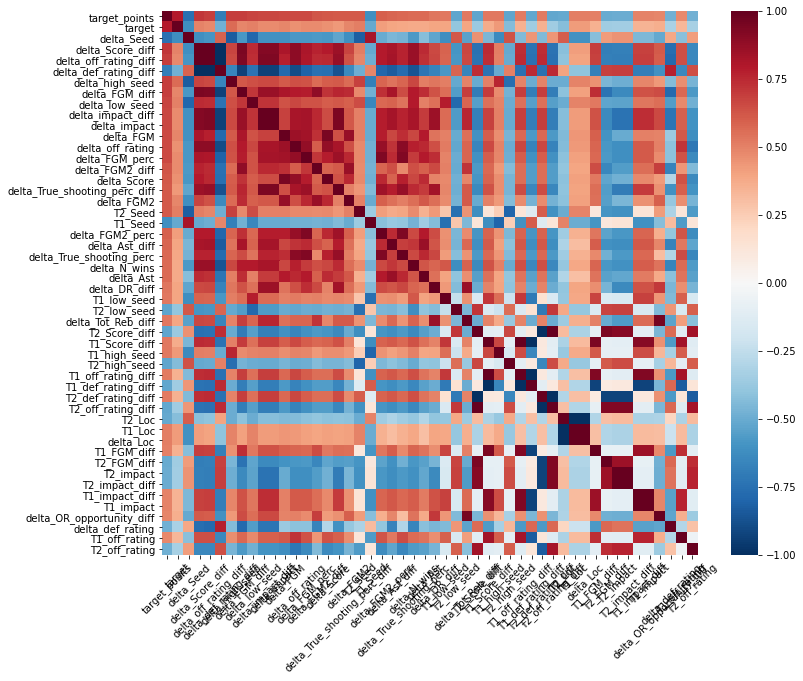

In [61]:
high_corr = tml.plot_correlations(df, target='target_points', limit=50)

                               delta_Seed  delta_Score_diff  \
delta_Seed                       1.000000         -0.616475   
delta_Score_diff                -0.616475          1.000000   
delta_off_rating_diff           -0.592136          0.994604   
delta_def_rating_diff            0.592136         -0.994604   
delta_high_seed                 -0.832711          0.676306   
delta_FGM_diff                  -0.581331          0.943205   
delta_low_seed                  -0.794002          0.745500   
delta_impact_diff               -0.609088          0.919468   
delta_impact                    -0.609088          0.919468   
delta_FGM                       -0.607557          0.815403   
delta_off_rating                -0.580273          0.894058   
delta_FGM_perc                  -0.579694          0.818907   
delta_FGM2_diff                 -0.576923          0.768833   
delta_Score                     -0.581901          0.792838   
delta_True_shooting_perc_diff   -0.530140          0.85

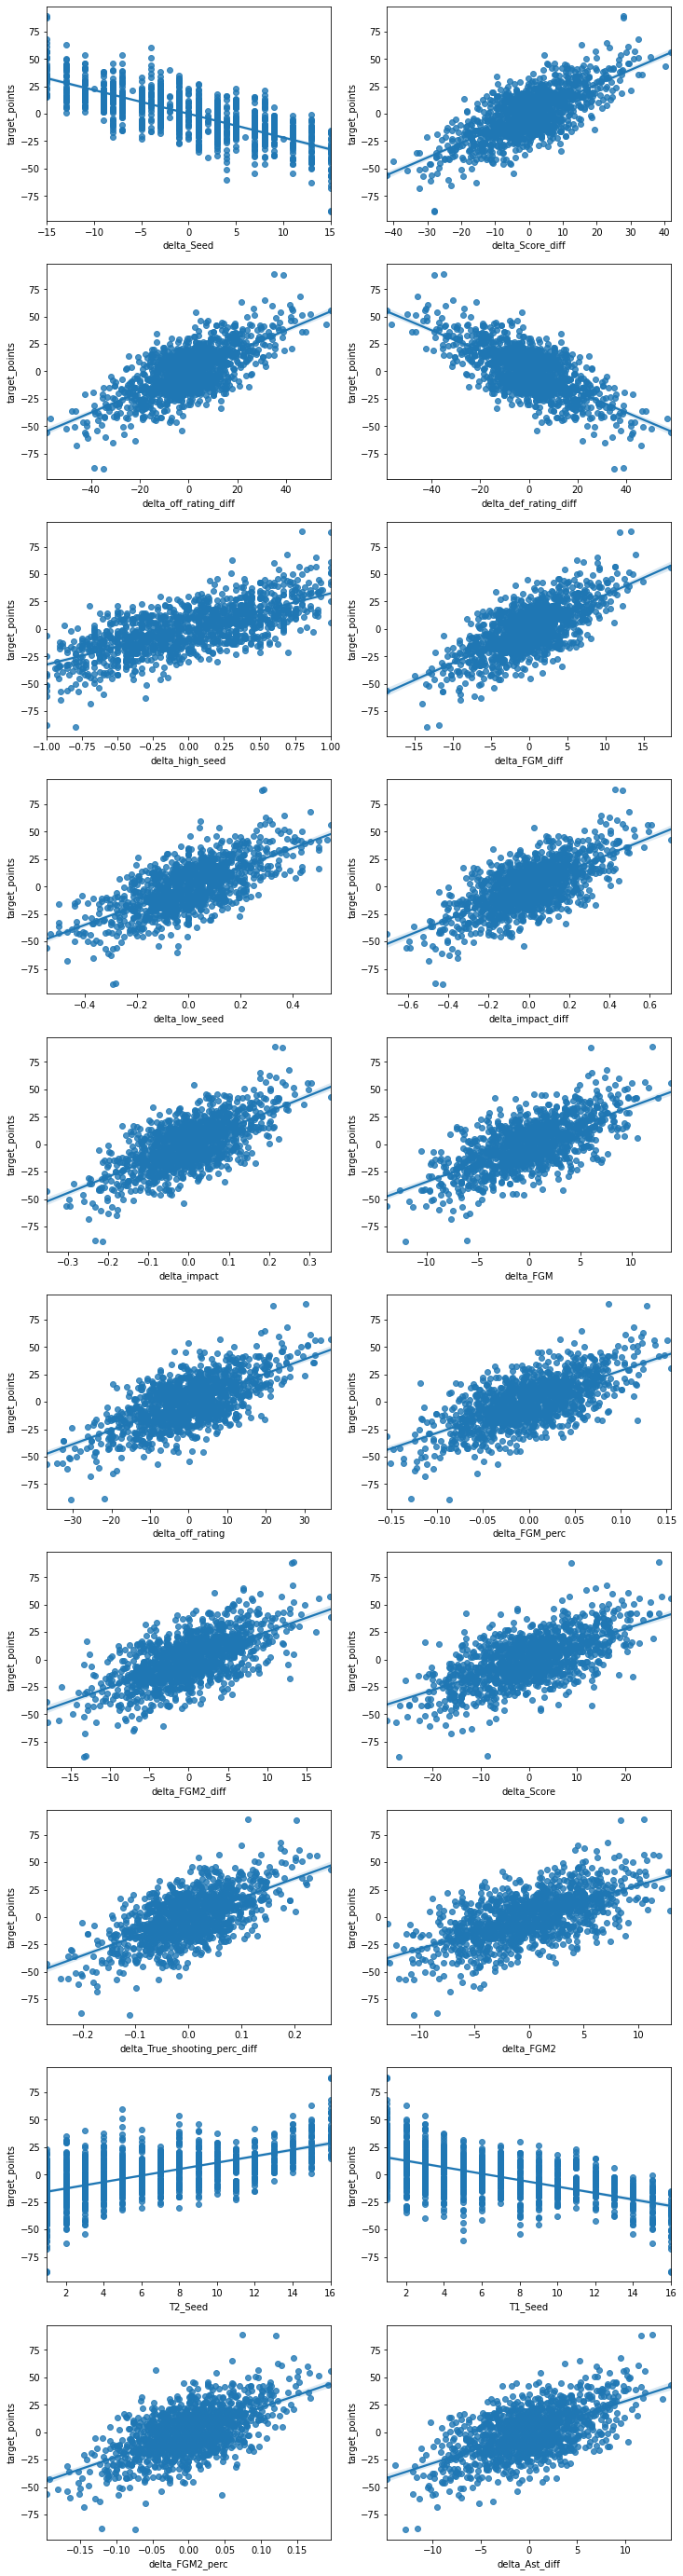

In [62]:
tml.corr_target(df, 'target_points', list(high_corr[2:22].index), x_estimator=None)

In [64]:
for col in [col for col in df if 'delta' in col]:
    df[f'sign_{col}'] = np.sign(df[col])

In [65]:
feats = []
scores = []

for col in [col for col in df if 'sign_' in col]:
    try:
        scores.append(df.groupby(col)['target'].mean()[1])
        feats.append(col)
    except KeyError:
        continue

segments = pd.DataFrame({'feat': feats, 'score': scores})
                      
segments.sort_values(by='score', ascending=False)

,feat,score
0,sign_delta_Loc,0.851064
24,sign_delta_FGM2,0.719048
26,sign_delta_FGM2_diff,0.714968
23,sign_delta_FGM,0.708134
89,sign_delta_FGM_perc,0.700000
...,...,...
51,sign_delta_PF_diff,0.387917
69,sign_delta_def_rating,0.373016
70,sign_delta_def_rating_advantage,0.370787
71,sign_delta_def_rating_diff,0.317460
